In [12]:
import numpy as np
import matplotlib.pyplot as plt

### 1

Даны значения величины заработной платы заемщиков банка (zp) и значения их поведенческого кредитного скоринга (ks): zp = [35, 45, 190, 200, 40, 70, 54, 150, 120, 110], ks = [401, 574, 874, 919, 459, 739, 653, 902, 746, 832]. Используя математические операции, посчитать коэффициенты линейной регрессии, приняв за X заработную плату (то есть, zp - признак), а за y - значения скорингового балла (то есть, ks - целевая переменная). Произвести расчет как с использованием intercept, так и без.

#### С интерсептом

In [3]:
x = np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110])
y = np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])

n = np.count_nonzero(x)

In [8]:
# Вычислим коэффициент B
b = (np.mean(x*y) - np.mean(x) * np.mean(y)) / (np.mean(x**2) - np.mean(x)**2)
b

2.620538882402765

In [9]:
# Вычислим интерсепт
a = np.mean(y) - b*np.mean(x)
a

444.1773573243596

In [10]:
# Получили модель y_hat = 444.17 + 2.62 * x
y_hat = a + b * x
y_hat

array([535.89621821, 562.10160703, 942.07974498, 968.2851338 ,
       548.99891262, 627.61507909, 585.68645697, 837.25818968,
       758.64202321, 732.43663439])

<function matplotlib.pyplot.show(*args, **kw)>

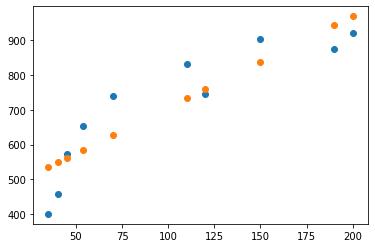

In [13]:
plt.scatter(x, y)
plt.scatter(x, y_hat)
plt.show

In [18]:
# Посчитаем среднюю квадратичную ошибку
mse = np.sum((y - y_hat)**2) / n

mse, a, b

(6470.414201176658, 444.1773573243596, 2.620538882402765)

In [16]:
# Проверим результат через матричный метод поиска коэффициентов
# B_hat = ((x_t * x)**-1) * x_t * y


X = x.reshape((10, 1))
Y = y.reshape((10, 1))

# так как сейчас мы считаем модель с интерсептой, добавим столбец с единицами
X = np.hstack([np.ones((10, 1)), X])
X

array([[  1.,  35.],
       [  1.,  45.],
       [  1., 190.],
       [  1., 200.],
       [  1.,  40.],
       [  1.,  70.],
       [  1.,  54.],
       [  1., 150.],
       [  1., 120.],
       [  1., 110.]])

In [17]:
# умножаем матрицы с помощью функции np.dot, обратную матрицу находим с помощью np.linalg.inv, транспонируем с помощью .T
# @Y используем для того, чтобы дополнительно умножить на матрицу Y

B = np.dot(np.linalg.inv(np.dot(X.T, X)), X.T@Y)
B

array([[444.17735732],
       [  2.62053888]])

In [19]:
# Получили те же самые коэффициенты

#### Без интерсепта

In [21]:
x = np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110])
y = np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])

n = np.count_nonzero(x)

X = x.reshape((10, 1))
Y = y.reshape((10, 1))

B = np.dot(np.linalg.inv(np.dot(X.T, X)), X.T@Y)
B

array([[5.88982042]])

In [30]:
# Получили коэффициент B, равный 5.89. Тогда модель y_hat = 5.89 * x
y_hat = B * x
y_hat

array([[ 206.1437147 ,  265.04191891, 1119.06587983, 1177.96408403,
         235.59281681,  412.28742941,  318.05030269,  883.47306302,
         706.77845042,  647.88024621]])

<function matplotlib.pyplot.show(*args, **kw)>

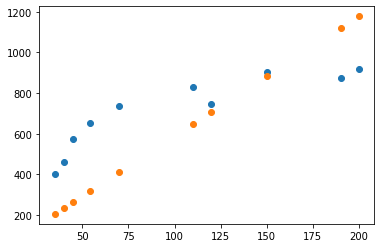

In [33]:
plt.scatter(x, y)
plt.scatter(x, y_hat)
plt.show

In [34]:
# Посчитаем среднюю квадратичную ошибку
mse = np.sum((y - y_hat)**2) / n

mse, B

(56516.8584157194, array([[5.88982042]]))

In [35]:
# В варианте без интерсепта ошибка получилась больше

## 2

Посчитать коэффициент линейной регрессии при заработной плате (zp), используя градиентный спуск (без intercept).

In [74]:
x = np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110])
y = np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])

n = np.count_nonzero(x)

In [75]:
# Возьмем модель без интерсепта y_hat = B1 * x

# Нам понадобится alpha - скорость обучения - и начальный b1, который будем изменять

alpha = 1e-5
b1 = 1

In [76]:
for i in range (101):
    b1 -= alpha * (2/n) * np.sum((b1*x - y)*x)
    if i%10==0:
        print('Iteration: {i}, b1={b1}, mse={mse}'.format(i=i, b1=b1, mse=np.sum((b1*x - y)**2) / n))

Iteration: 0, b1=2.347302, mse=229405.42884192182
Iteration: 10, b1=5.748727835228332, mse=56791.110810876475
Iteration: 20, b1=5.884200938409783, mse=56517.293461113455
Iteration: 30, b1=5.889596605572516, mse=56516.859105830044
Iteration: 40, b1=5.889811505973018, mse=56516.858416814124
Iteration: 50, b1=5.8898200650966155, mse=56516.85841572114
Iteration: 60, b1=5.889820405992196, mse=56516.85841571941
Iteration: 70, b1=5.889820419569496, mse=56516.85841571941
Iteration: 80, b1=5.889820420110257, mse=56516.8584157194
Iteration: 90, b1=5.889820420131795, mse=56516.85841571941
Iteration: 100, b1=5.8898204201326525, mse=56516.8584157194


In [64]:
# Достаточно 50 итераций, чтобы получить среднюю квадратичную ошибу, как в предыдущем задании

## 3

Произвести вычисления как в пункте 2, но с вычислением intercept. Учесть, что изменение коэффициентов должно производиться на каждом шаге одновременно (то есть изменение одного коэффициента не должно влиять на изменение другого во время одной итерации).

In [116]:
x = np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110])
y = np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])

n = np.count_nonzero(x)

In [117]:
alpha = 1e-5
a = 1
b = 0.1

In [118]:
for i in range (10000):
    # рассчитываем y_hat с текущими коэффициентами a и b 
    y_hat = a + b * x
    
    # вычисляем отклонение от y
    error = (y - y_hat)
    
    # вычисляем градиенты
    a_grad = -2 * error.mean()
    b_grad = -2 * (x * error).mean()
    
    # обновляем a и b
    a = a - alpha * a_grad
    b = a - alpha * b_grad
    
    if i%1000==0:
        print(a, b)

1.0139752 2.607228
5.984813303152525 5.955120016425152
6.981146023147803 6.734374082684839
7.180812018043755 6.890537315402113
7.220825267350668 6.92183257109423
7.228843959371465 6.928104169163718
7.23045091263914 6.929361003194152
7.230772947554287 6.92961287389163
7.230837483647937 6.929663349011425
7.23085041674056 6.929673464271933


In [119]:
# Получили модель y_hat = 7.23 + 6.93 * x

<function matplotlib.pyplot.show(*args, **kw)>

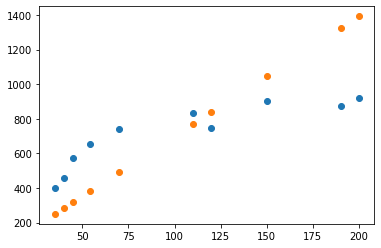

In [120]:
plt.scatter(x, y)
plt.scatter(x, y_hat)
plt.show